# Student performance analyse

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
from sklearn.preprocessing import StandardScaler

## Inleiding

Deze dataset bevat informatie over studenten van een school en hun prestaties. Hierin kun je ziet wat hun gemiddelde cijfer is aan het eind van de eerste periode en wat hun gemiddelde cijfer is aan het eind van het jaar. In dit notebook ga ik analyses uitvoeren op deze dataset om te zoeken naar verbanden tussen variabelen.

In [129]:
student_performance = pd.read_csv("student_performance_basis.csv")

In [3]:
student_performance

,age,sex,Medu,Fedu,reason,absences,G1,G3
0,18,F,4,4,course,6,5,6
1,17,F,1,1,course,4,5,6
2,15,F,1,1,other,10,7,10
3,15,F,4,2,home,2,15,15
4,16,F,3,3,home,4,6,10
...,...,...,...,...,...,...,...,...
1039,19,F,2,3,course,4,10,10
1040,18,F,3,1,course,4,15,16
1041,18,F,1,1,course,6,11,9
1042,17,M,3,1,course,6,10,10


In [4]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1044 non-null   int64 
 1   sex       1044 non-null   object
 2   Medu      1044 non-null   int64 
 3   Fedu      1044 non-null   int64 
 4   reason    1044 non-null   object
 5   absences  1044 non-null   int64 
 6   G1        1044 non-null   int64 
 7   G3        1044 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 65.4+ KB


# Data Dictionary

| variabel | description   | datatype | num or cat  | sort    | possible values |
|----------|---------------|----------|-------------|---------|-----------------|
| age      | student's age | int      | numeric     | ratio   | 15-22 |
| sex      | student's sex | binary   | categorical | nominal |"F", "M" |
| Medu     | mother's education | int   | categorical | ordinal | 0(none), 1(4th grade), 2(5th to 9th grade), 3(sec. ed.), 4 (higher ed)  |
| Fedu     | father's education | int   | categorical | ordinal | 0(none), 1(4th grade), 2(5th to 9th grade), 3(sec. ed.), 4 (higher ed)   |
| reason   | reason to choose this school | String   | categorical | nominal | "home", "reputation", "course", "other"   |
| absences | number of school absences | int   | numeric | ratio | 0-93   |
| G1     | first period grade | int   | numeric | ratio | 0-20   |
| G3     | final grade | int   | numeric | ratio | 0-20   |

In deze dataset zitten dus vier numerieke variabelen: 'age', 'absences', 'G1' en 'G3'. Daarnaast zijn er 4 categorische variabelen: 'sex', 'Medu', 'Fedu' en 'reason'. 

## Categorische variabelen

De categorische variabelen van deze dataset zijn: sex, Medu, Fedu, reason. Hieronder ga ik deze variabelen analyseren.

In [5]:
student_performance['sex'].unique()
student_performance['sex'].value_counts()

sex
F    591
M    453
Name: count, dtype: int64

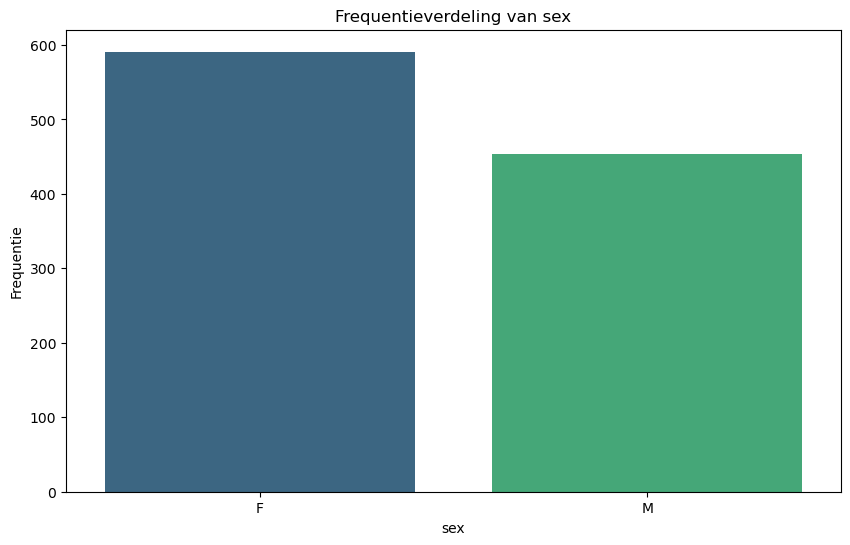

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=student_performance, palette='viridis')
plt.title(f'Frequentieverdeling van sex')
plt.xlabel('sex')
plt.ylabel('Frequentie')
plt.show()

In deze dataset is het verschil tussen man en vrouw niet heel groot. Toch zijn er meer vrouwelijke dan mannelijke studenten in deze dataset.

In [7]:
student_performance['Medu'].unique()
student_performance['Medu'].value_counts()

Medu
4    306
2    289
3    238
1    202
0      9
Name: count, dtype: int64

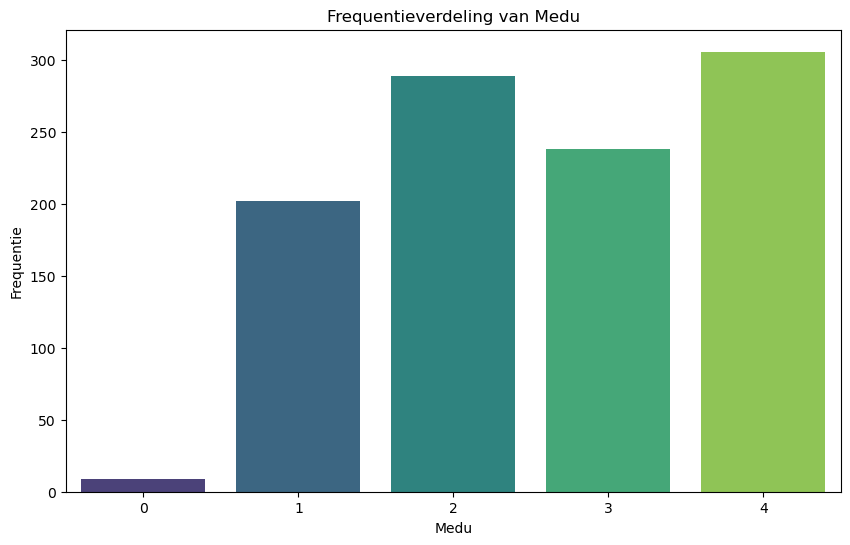

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Medu', data=student_performance, palette='viridis')
plt.title(f'Frequentieverdeling van Medu')
plt.xlabel('Medu')
plt.ylabel('Frequentie')
plt.show()

De educatie van de moeders van de studenten ligt vrij hoog.
De meeste moeders hebben hogere educatie gehad. Daarna hebben de meeste 
5th to 6th grade voltooid. De frequentie van moeders
die geen educatie hebben gehad ligt dicht bij de 0.

In [9]:
student_performance['Fedu'].unique()
student_performance['Fedu'].value_counts()

Fedu
2    324
1    256
3    231
4    224
0      9
Name: count, dtype: int64

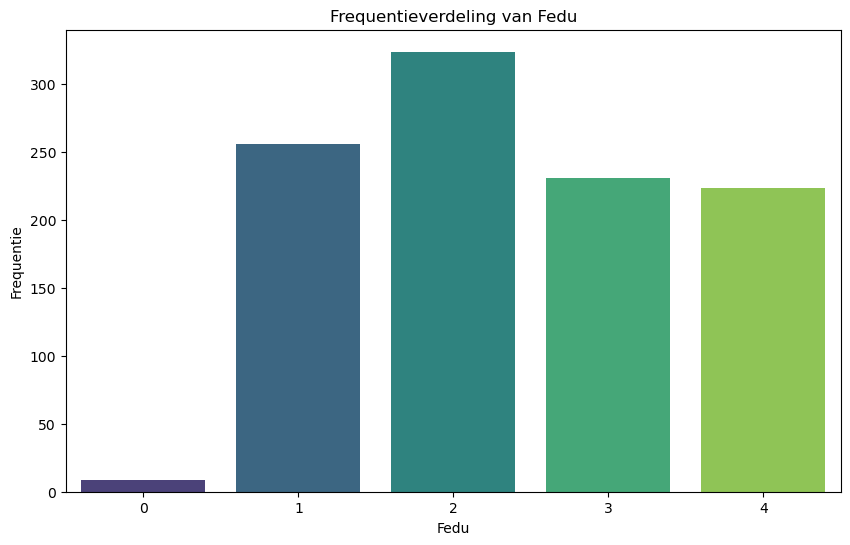

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Fedu', data=student_performance, palette='viridis')
plt.title(f'Frequentieverdeling van Fedu')
plt.xlabel('Fedu')
plt.ylabel('Frequentie')
plt.show()

In deze dataset hebben de meeste vaders 5th to 6th grade afgerond. De frequentie voor secondary education en higher education ligt lager dan bij de moeders. Ook hier ligt het aantal vaders wat geen educatie heeft gehad dicht bij de nul.

In [11]:
student_performance['reason'].unique()
student_performance['reason'].value_counts()

reason
course        430
home          258
reputation    248
other         108
Name: count, dtype: int64

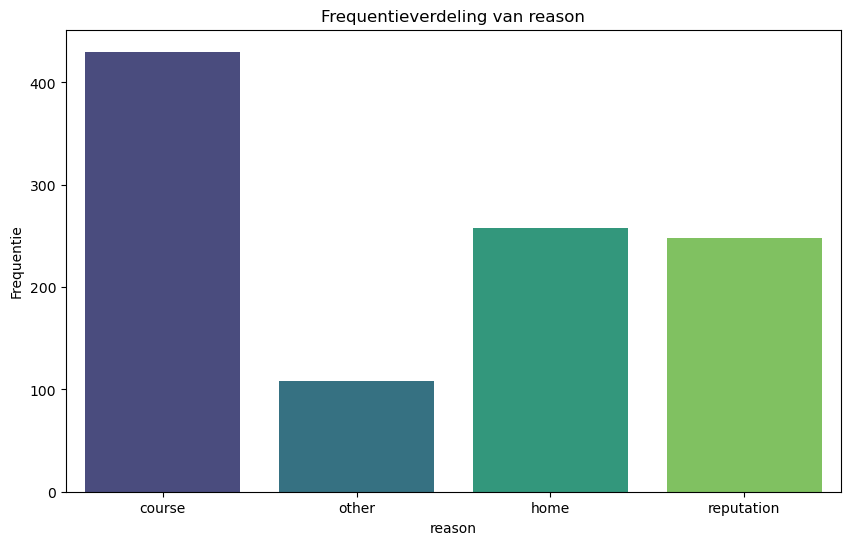

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='reason', data=student_performance, palette='viridis')
plt.title(f'Frequentieverdeling van reason')
plt.xlabel('reason')
plt.ylabel('Frequentie')
plt.show()

De meeste studenten hebben deze school gekozen voor de lessen die er zijn. De frequentie van studenten die voor deze school gekozen hebben doordat het dicht bij huis is en door de reputatie van de school liggen even hoog.

## Numerieke variabelen

De numerieke variabelen van deze dataset zijn: age, absences, G1, G3. Hieronder ga ik deze variabelen analyseren.

### age

In [13]:
mean_age = np.mean(student_performance['age'])
print(f"de gemiddelde leeftijd is {mean_age} jaar")

de gemiddelde leeftijd is 16.726053639846743 jaar


In [14]:
mod_age = st.mode(student_performance["age"])
print(f"de meest voorkomende leeftijd is {mod_age}")

de meest voorkomende leeftijd is 16


In [15]:
std_age = np.std(student_performance["age"])
print(f"De standaardeviatie van leeftijd is {std_age}")

De standaardeviatie van leeftijd is 1.2393806932778517


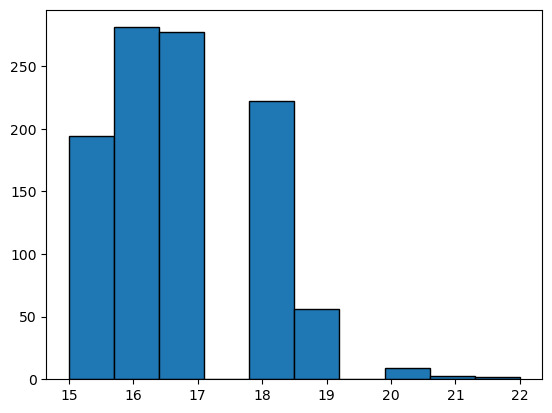

In [16]:
plt.hist(student_performance['age'], edgecolor='black')
plt.show()

Age heeft geen normaalverdeling.

In [17]:
scaler = StandardScaler()
scaler.fit(student_performance[['age']])

X_train = scaler.transform(student_performance[['age']])

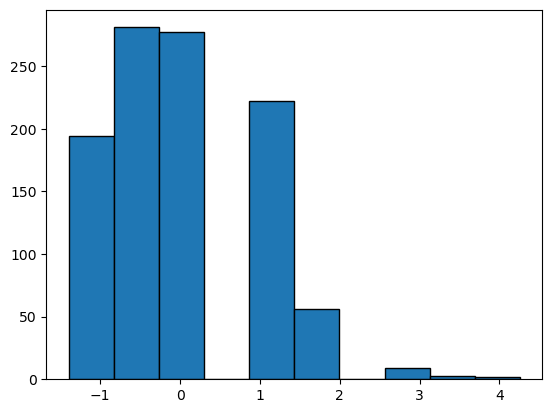

In [18]:
plt.hist(X_train, edgecolor='black')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x198aaed3490>,
 'caps': [<matplotlib.lines.Line2D at 0x198aaee0c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x198aaec2b10>],
 'medians': [<matplotlib.lines.Line2D at 0x198aaee2290>],
 'fliers': [<matplotlib.lines.Line2D at 0x198aaee2c50>],
 'means': []}

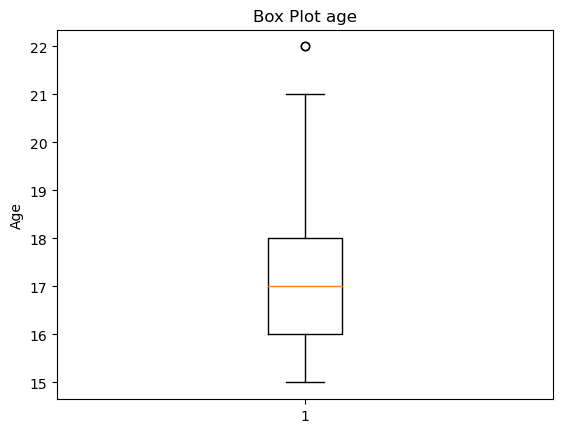

In [19]:
fig, ax = plt.subplots()
ax.set_title('Box Plot age')
ax.set_ylabel('Age')
ax.boxplot(student_performance['age'])

### absences

In [20]:
gem_absences = np.mean(student_performance['absences'])
print(f"de gemiddelde afwezigheid is {gem_absences} uur")

de gemiddelde afwezigheid is 4.434865900383142 uur


In [21]:
mod_absences = st.mode(student_performance["absences"])
print(f"Het meest voorkomende afwezigheids aantal is {mod_absences}")

Het meest voorkomende afwezigheids aantal is 0


In [22]:
std_absences = np.std(student_performance["absences"])
print(f"De standaardeviatie van afwezigheid is {std_absences}")

De standaardeviatie van afwezigheid is 6.207041706358111


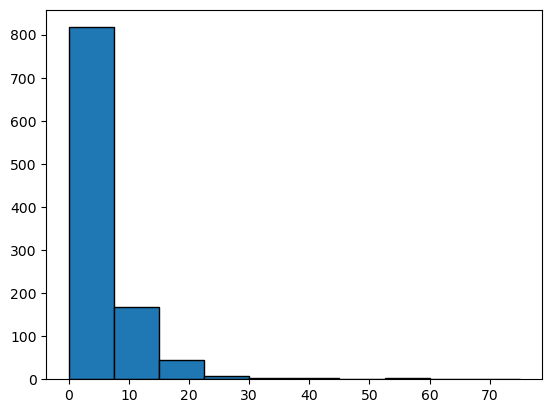

In [23]:
plt.hist(student_performance['absences'], edgecolor='black')
plt.show()

Absences heeft geen normaal verdeling.

In [24]:
student_performance['absences']

0        6
1        4
2       10
3        2
4        4
        ..
1039     4
1040     4
1041     6
1042     6
1043     4
Name: absences, Length: 1044, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x198ab2d2510>,
 'caps': [<matplotlib.lines.Line2D at 0x198a4971d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x198ab2d1c10>],
 'medians': [<matplotlib.lines.Line2D at 0x198a497b990>],
 'fliers': [<matplotlib.lines.Line2D at 0x198aa2e9290>],
 'means': []}

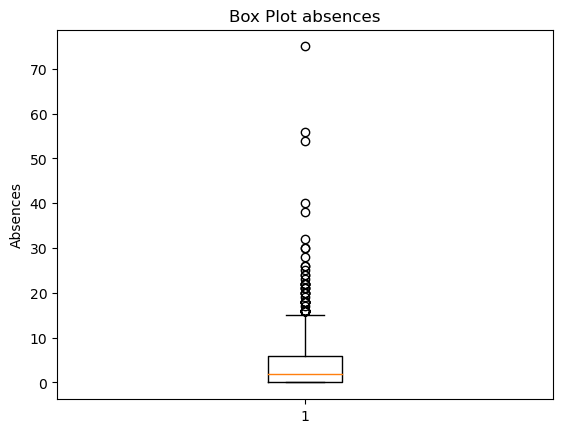

In [25]:
fig, ax = plt.subplots()
ax.set_title('Box Plot absences')
ax.set_ylabel('Absences')
ax.boxplot(student_performance['absences'])

### G1

In [26]:
modus_g1 = st.mode(student_performance['G1'])
print(f"Het meest voorkomende cijfer uit de eerste periode is een {modus_g1}")

Het meest voorkomende cijfer uit de eerste periode is een 10


In [27]:
mean_g1 = np.mean(student_performance['G1'])
print(f"Het gemiddelde cijfer van periode 1 is {mean_g1}")

Het gemiddelde cijfer van periode 1 is 11.21360153256705


In [28]:
std_g1 = np.std(student_performance["G1"])
print(f"De standaardeviatie van G1 is {std_g1}")

De standaardeviatie van G1 is 2.9819647631866197


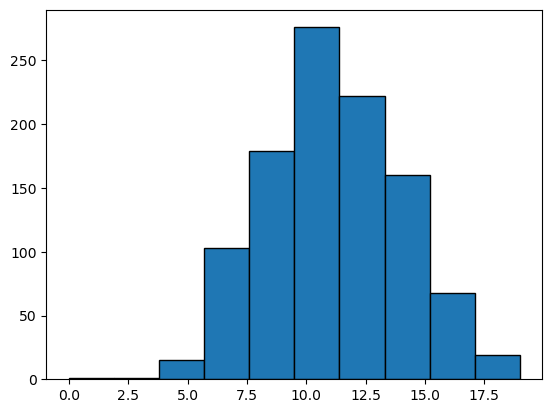

In [29]:
plt.hist(student_performance['G1'], edgecolor='black')
plt.show()

De variabele G1 is normaal verdeeld

{'whiskers': [<matplotlib.lines.Line2D at 0x198ab33bf50>,
 'caps': [<matplotlib.lines.Line2D at 0x198ab34d750>,
 'boxes': [<matplotlib.lines.Line2D at 0x198aae49750>],
 'medians': [<matplotlib.lines.Line2D at 0x198ab34ec50>],
 'fliers': [<matplotlib.lines.Line2D at 0x198ab34f6d0>],
 'means': []}

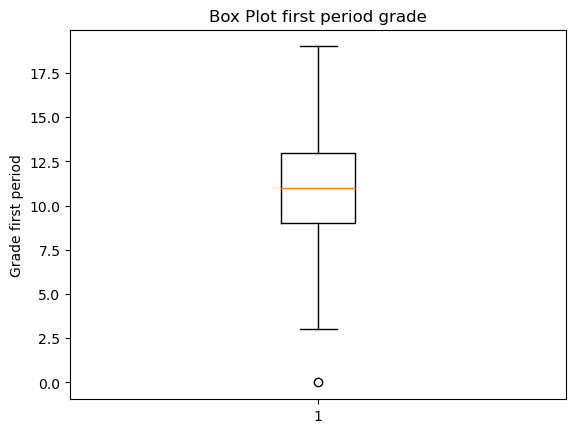

In [30]:
fig, ax = plt.subplots()
ax.set_title('Box Plot first period grade')
ax.set_ylabel('Grade first period')
ax.boxplot(student_performance['G1'])

### G3

In [31]:
modus_g3 = st.mode(student_performance['G3'])
print(f"Het meest voorkomende eindcijfer is een {modus_g3}")

Het meest voorkomende eindcijfer is een 10


In [32]:
mean_g3 = np.mean(student_performance['G3'])
print(f"Het gemiddelde eindcijfer is {mean_g3}")

Het gemiddelde eindcijfer is 11.341954022988507


In [33]:
std_g3 = np.std(student_performance["G3"])
print(f"De standaardeviatie van leeftijd is {std_g3}")

De standaardeviatie van leeftijd is 3.86294440508964


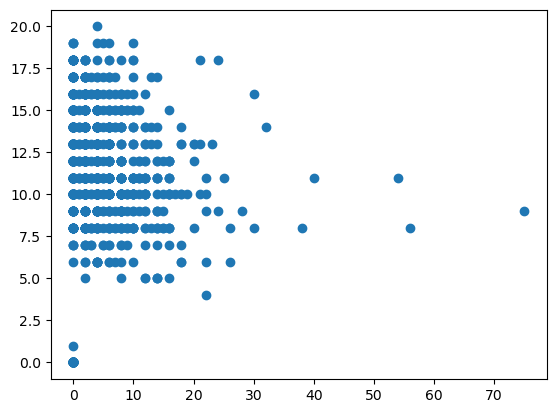

In [34]:
plt.scatter(student_performance['absences'],student_performance['G3'])

Hierboven zie je de verhouding tussen afwezigheid(x-as) en het eindcijfer(y-as)

In [35]:
unique, counts = np.unique(student_performance['G3'], return_counts=True)
arr_g3 = np.asarray((unique, counts)).T
print(arr_g3)

[[  0  53]
 [  1   1]
 [  4   1]
 [  5   8]
 [  6  18]
 [  7  19]
 [  8  67]
 [  9  63]
 [ 10 153]
 [ 11 151]
 [ 12 103]
 [ 13 113]
 [ 14  90]
 [ 15  82]
 [ 16  52]
 [ 17  35]
 [ 18  27]
 [ 19   7]
 [ 20   1]]


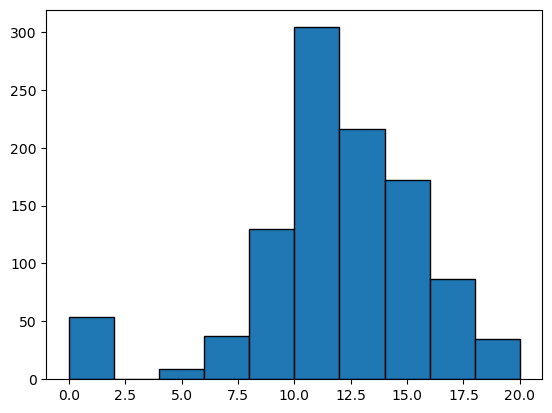

In [36]:
plt.hist(student_performance['G3'], edgecolor='black')
plt.show()

De variabele G3 heeft ook een normaal verdeling

{'whiskers': [<matplotlib.lines.Line2D at 0x198ab63fed0>,
 'caps': [<matplotlib.lines.Line2D at 0x198ab651550>,
 'boxes': [<matplotlib.lines.Line2D at 0x198ab63f0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x198ab652bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x198ab651110>],
 'means': []}

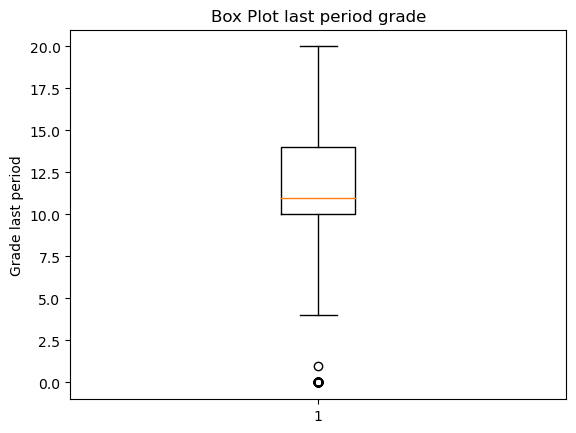

In [37]:
fig, ax = plt.subplots()
ax.set_title('Box Plot last period grade')
ax.set_ylabel('Grade last period')
ax.boxplot(student_performance['G3'])

## Vergelijken van categorische variabelen

### sex & reason

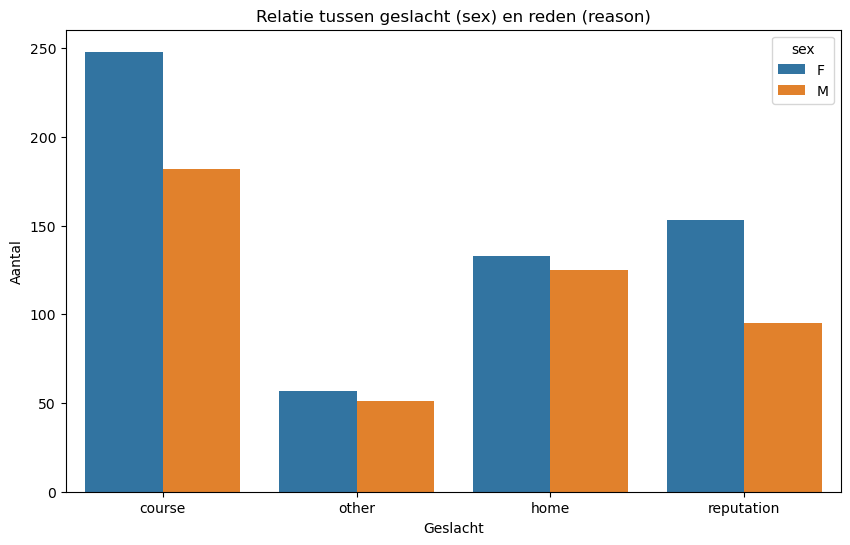

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='reason', hue='sex', data=student_performance)

plt.title('Relatie tussen geslacht (sex) en reden (reason)')
plt.xlabel('Geslacht')
plt.ylabel('Aantal')
plt.legend(title='sex', loc='upper right')

plt.show()

Bij zowel mannen als vrouwen is de voornaamste reden dat ze voor deze school hebben gekozen de lessen. Daarna vinden vrouwen de reputatie van de school het belangrijkst. Mannen vinden het na 'course' het belangrijkst dat de school dichtbij is.


### Medu & Reason

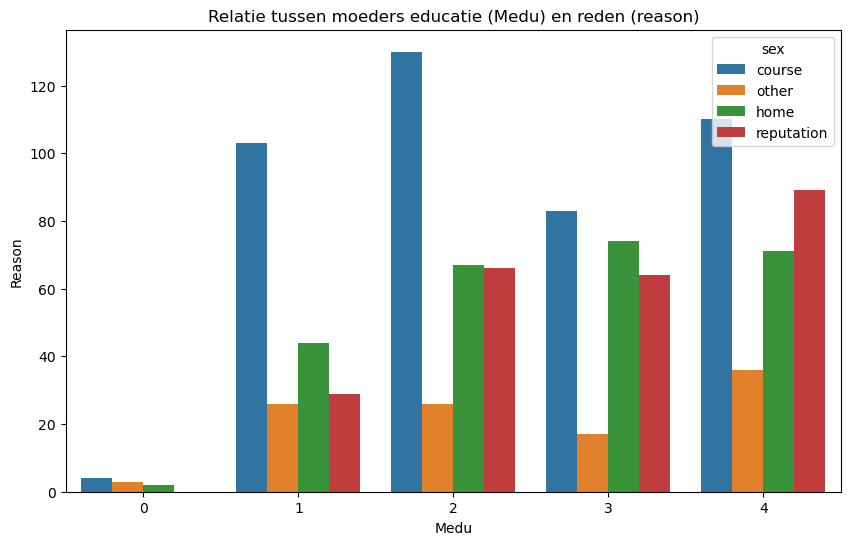

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Medu', hue='reason', data=student_performance)

plt.title('Relatie tussen moeders educatie (Medu) en reden (reason)')
plt.xlabel('Medu')
plt.ylabel('Reason')
plt.legend(title='sex', loc='upper right')

plt.show()

Wat je ziet in deze grafiek is dat er een stijgende lijn is bij hoe belangrijk de reputatie van de school is naarmate de educatie van de moeder hoger is.

### Fedu & Reason

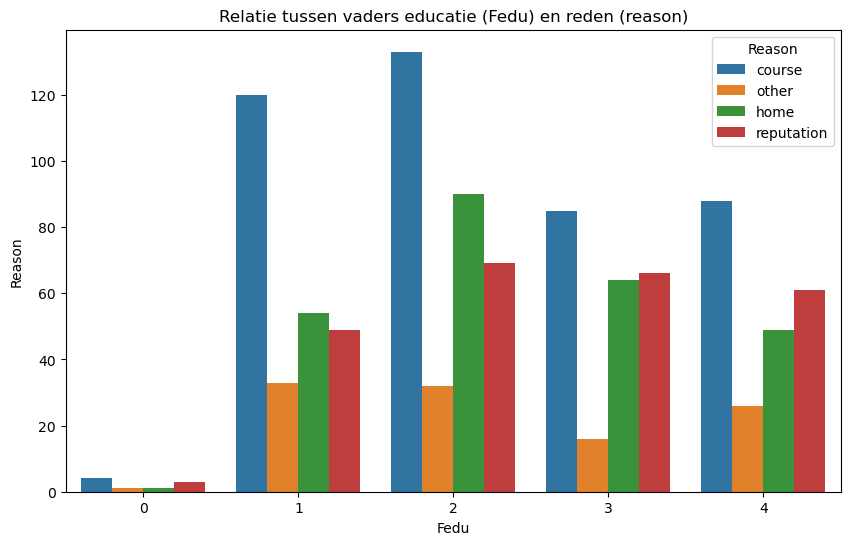

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Fedu', hue='reason', data=student_performance)

plt.title('Relatie tussen vaders educatie (Fedu) en reden (reason)')
plt.xlabel('Fedu')
plt.ylabel('Reason')
plt.legend(title='Reason', loc='upper right')

plt.show()

Bij deze grafiek zie je niet dezelfde stijging in het belang van de reputatie bij hogere educatie van vaders, zoals je dat bij de vorige grafiek zag. 

## relaties tussen numerieke variabelen

### Age & absences

In [49]:
numeric = student_performance[['age', 'absences', 'G1', 'G3']]
numeric_df = pd.DataFrame(numeric)

correlatiematrix = numeric_df.corr()
print(correlatiematrix)

               age  absences        G1        G3
age       1.000000  0.153196 -0.124121 -0.125282
absences  0.153196  1.000000 -0.092425 -0.045671
G1       -0.124121 -0.092425  1.000000  0.809142
G3       -0.125282 -0.045671  0.809142  1.000000


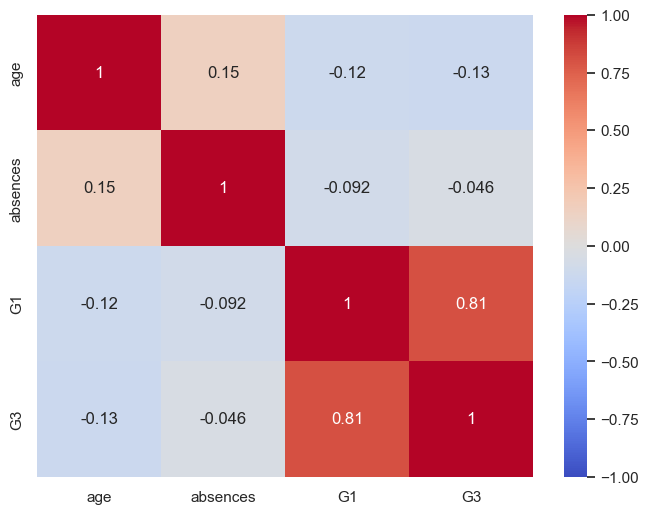

In [50]:
sns.set()
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlatiematrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1) 

C:\Users\sophi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


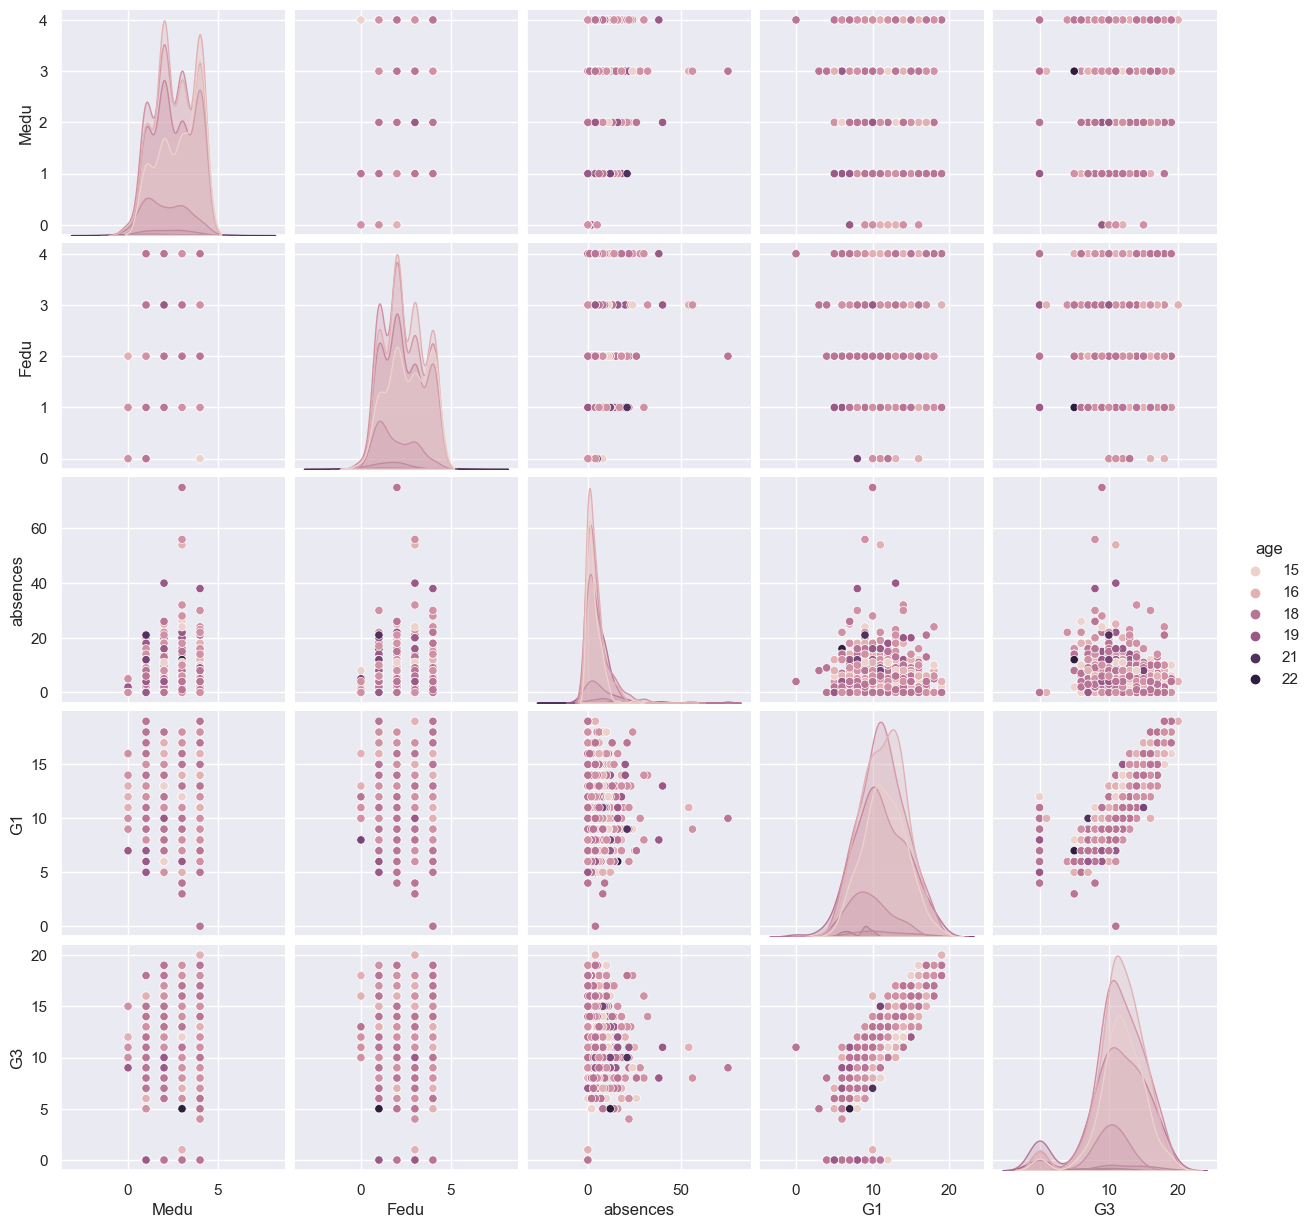

In [43]:
sns.pairplot(student_performance, hue='age')
plt.show()

Aan de hand van de heatmap kan ik zien dat 'G3' en 'age' een hoge correlatie met elkaar hebben. Dit is ook logisch als je erover nadenkt. Als je in de eerste periode een goed cijfer hebt is er een grote kans dat je dat aan het eind van het jaar ook hebt. 

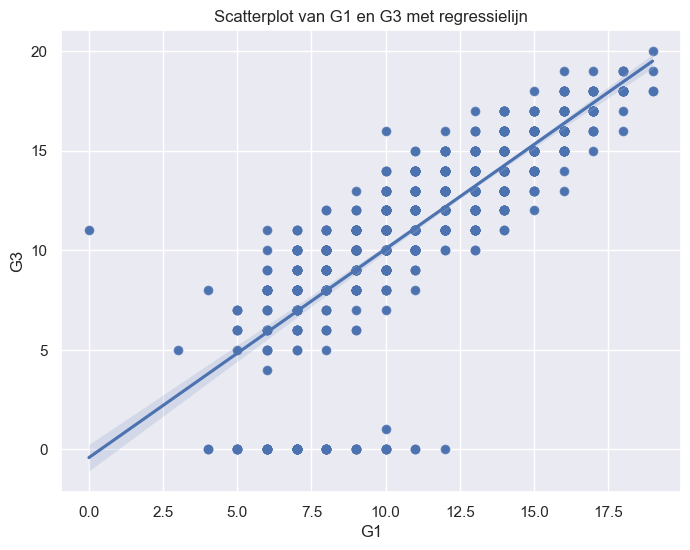

In [55]:
sns.set()
plt.figure(figsize=(8, 6))
scatterplot = sns.scatterplot(x='G1', y='G3', data=student_performance)

sns.regplot(x='G1', y='G3', data=student_performance, ax=scatterplot)

plt.title('Scatterplot van G1 en G3 met regressielijn')

plt.show()

Bij de variabelen 'G3' en 'age' is het overduidelijk dat ze geen verband hebben met elkaar. De correlatie is namelijk -0.15. 
Hieronder zie je het scatterplot met regressielijn van die twee variabelen.

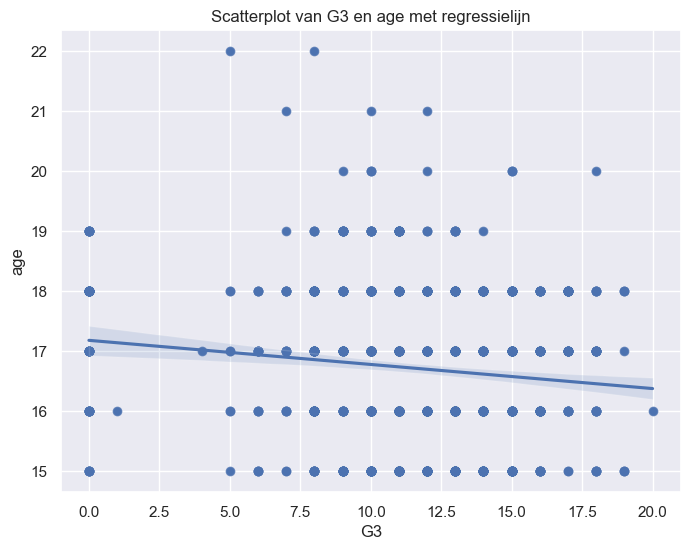

In [56]:
sns.set()
plt.figure(figsize=(8, 6))
scatterplot = sns.scatterplot(x='G3', y='age', data=student_performance)

sns.regplot(x='G3', y='age', data=student_performance, ax=scatterplot)

plt.title('Scatterplot van G3 en age met regressielijn')

plt.show()

Twee variabelen waarbij het minder duidelijk is of ze een verband hebben of niet zijn de variabelen 'absences' en 'age'. De correlatie bij deze variabelen is 0.15. Hieronder zie je weer de scatterplot met regressielijn.

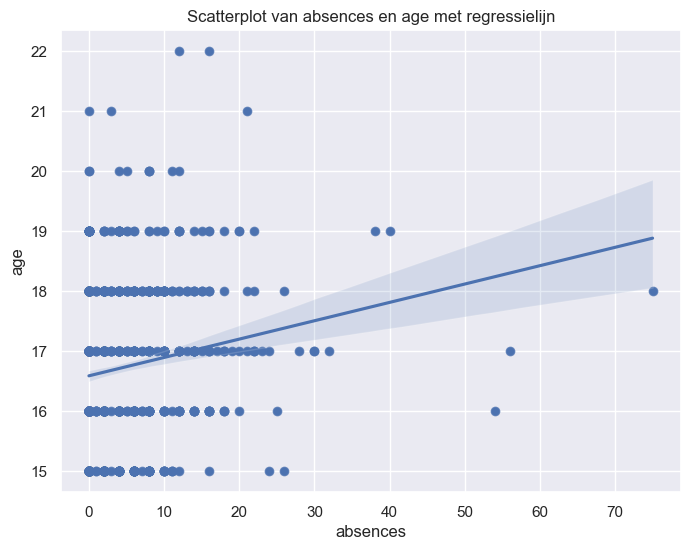

In [57]:
sns.set()
plt.figure(figsize=(8, 6))
scatterplot = sns.scatterplot(x='absences', y='age', data=student_performance)

sns.regplot(x='absences', y='age', data=student_performance, ax=scatterplot)

plt.title('Scatterplot van absences en age met regressielijn')

plt.show()

## Verbanden zoeken tussen categorische en numerieke variabelen

### Medu & age

In [59]:
medu_age = student_performance[['Medu', 'age']]

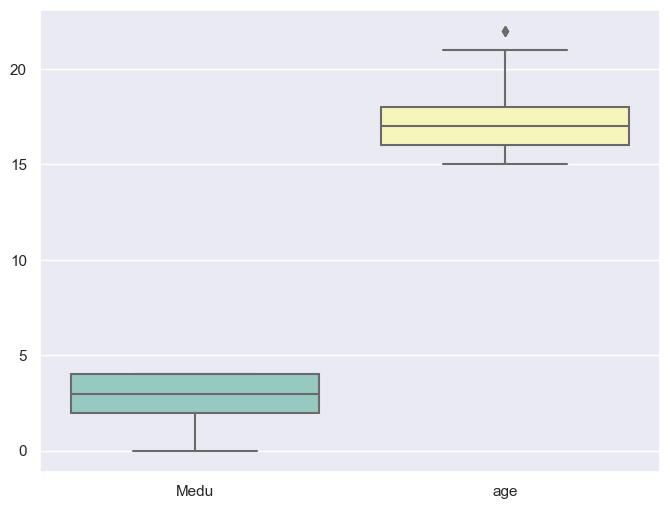

In [60]:
sns.set()
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=medu_age, palette="Set3")

In [65]:
mean_medu_age = student_performance.groupby('Medu')['age'].mean()

print(mean_medu_age)

Medu
0    17.111111
1    16.980198
2    16.737024
3    16.789916
4    16.486928
Name: age, dtype: float64


### Medu & absences

In [62]:
medu_abs = student_performance[['Medu', 'absences']]

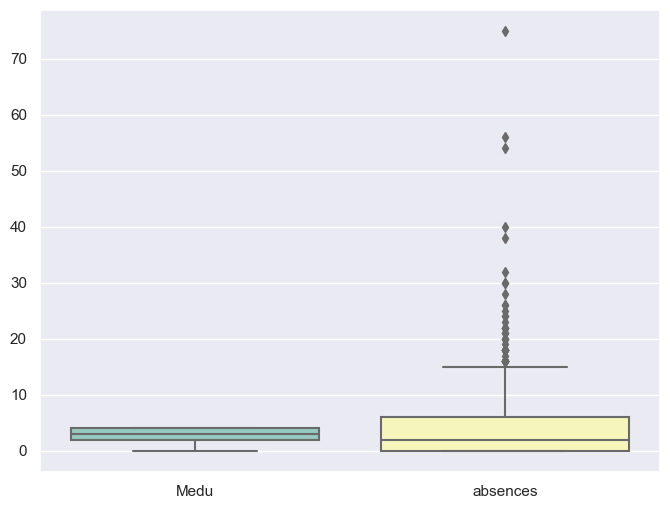

In [63]:
sns.set()
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=medu_abs, palette="Set3")

In [66]:
mean_medu_abs = student_performance.groupby('Medu')['absences'].mean()

print(mean_medu_abs)

Medu
0    0.777778
1    3.539604
2    4.266436
3    5.848739
4    4.192810
Name: absences, dtype: float64


### Medu & G1

In [67]:
medu_g1 = student_performance[['Medu', 'G1']]

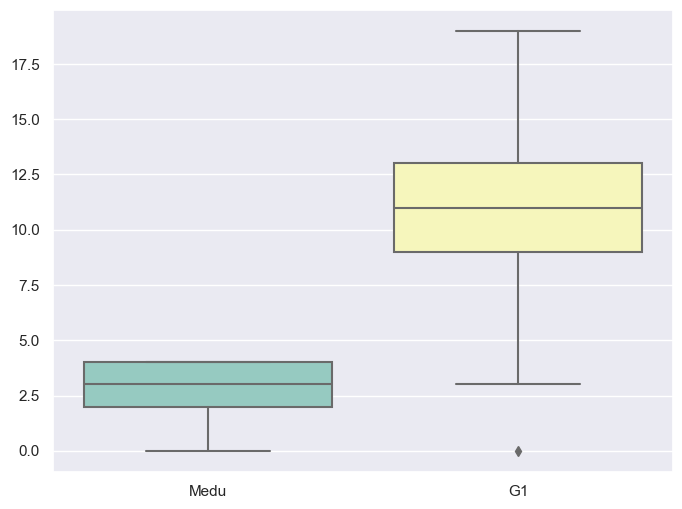

In [69]:
sns.set()
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=medu_g1, palette="Set3")

In [70]:
mean_medu_g1 = student_performance.groupby('Medu')['G1'].mean()

print(mean_medu_g1)

Medu
0    11.222222
1    10.207921
2    10.975779
3    11.025210
4    12.248366
Name: G1, dtype: float64


### Medu & G3

In [71]:
medu_g3 = student_performance[['Medu', 'G3']]

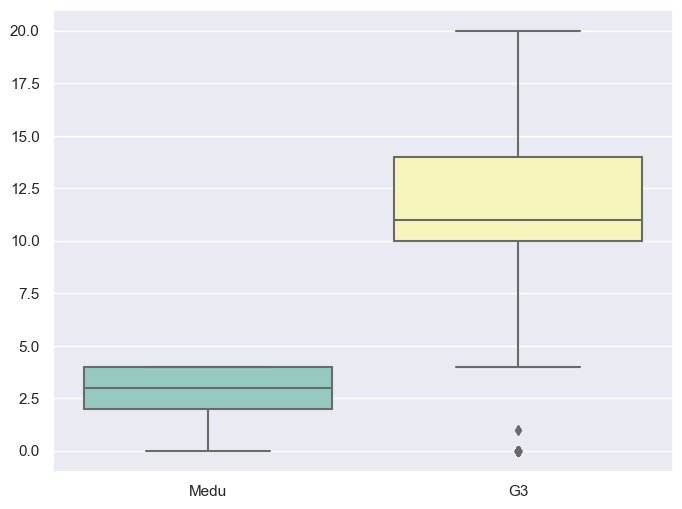

In [72]:
sns.set()
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=medu_g3, palette="Set3")

In [73]:
mean_medu_g3 = student_performance.groupby('Medu')['G3'].mean()

print(mean_medu_g3)

Medu
0    12.111111
1    10.178218
2    10.972318
3    11.247899
4    12.509804
Name: G3, dtype: float64


### Fedu & age

In [75]:
fedu_age = student_performance[['Fedu', 'age']]

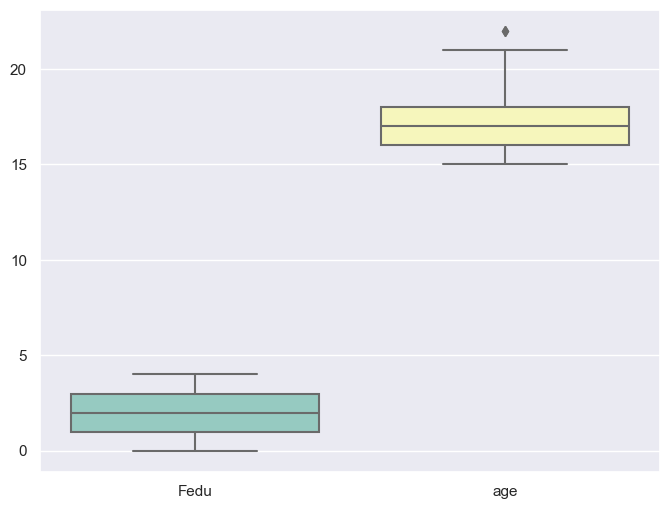

In [76]:
sns.set()
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=fedu_age, palette="Set3")

In [77]:
mean_fedu_age = student_performance.groupby('Fedu')['age'].mean()

print(mean_fedu_age)

Fedu
0    16.777778
1    17.027344
2    16.694444
3    16.658009
4    16.495536
Name: age, dtype: float64


### Fedu & absences

In [78]:
fedu_abs = student_performance[['Fedu', 'absences']]

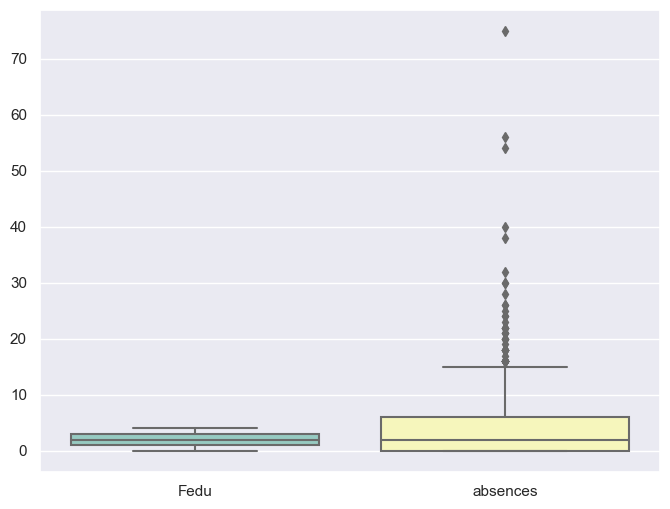

In [79]:
sns.set()
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=fedu_abs, palette="Set3")

In [80]:
mean_fedu_abs = student_performance.groupby('Fedu')['absences'].mean()

print(mean_fedu_abs)

Fedu
0    2.222222
1    3.972656
2    4.422840
3    5.090909
4    4.392857
Name: absences, dtype: float64


### Fedu & G1

In [81]:
fedu_g1 = student_performance[['Fedu', 'G1']]

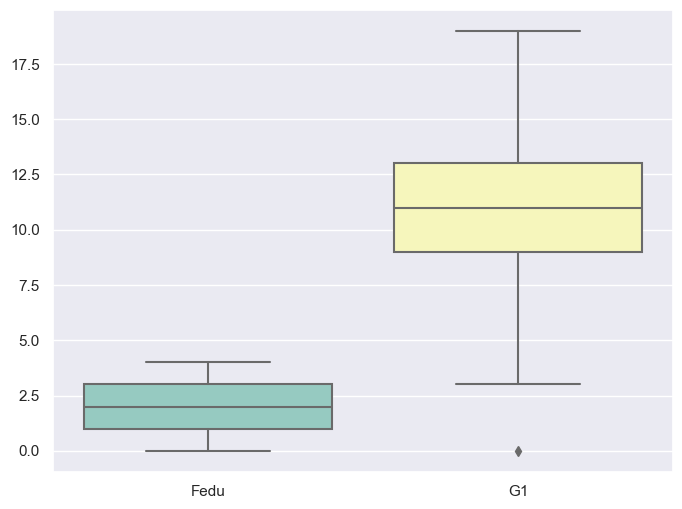

In [82]:
sns.set()
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=fedu_g1, palette="Set3")

In [83]:
mean_fedu_g1 = student_performance.groupby('Fedu')['G1'].mean()

print(mean_fedu_g1)

Fedu
0    11.555556
1    10.269531
2    11.246914
3    11.303030
4    12.138393
Name: G1, dtype: float64


### Fedu & G3

In [84]:
fedu_g3 = student_performance[['Fedu', 'G3']]

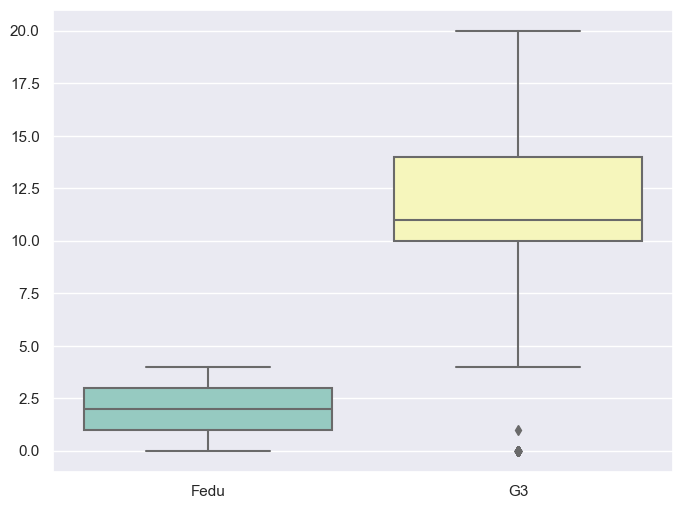

In [85]:
sns.set()
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=fedu_g3, palette="Set3")

In [86]:
mean_fedu_g3 = student_performance.groupby('Fedu')['G3'].mean()

print(mean_fedu_g3)

Fedu
0    12.333333
1    10.367188
2    11.243827
3    11.636364
4    12.254464
Name: G3, dtype: float64


### sex & age

In [87]:
sex_age = student_performance[['sex', 'age']]

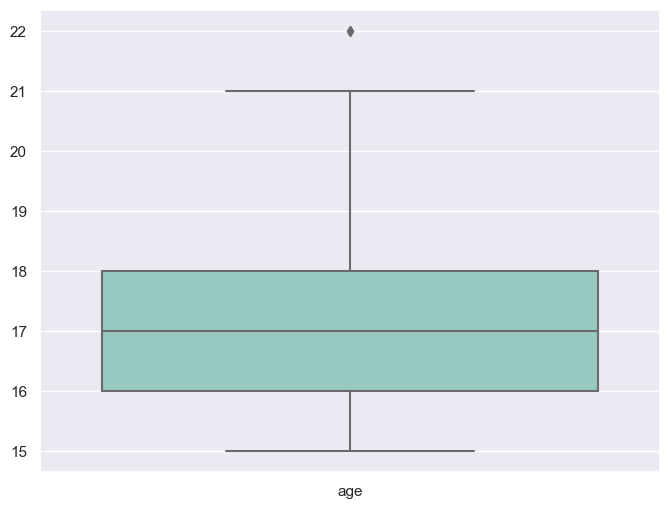

In [88]:
sns.set()
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=sex_age, palette="Set3")

In [90]:
mean_sex_age = student_performance.groupby('sex')['age'].mean()

print(mean_sex_age)

sex
F    16.768190
M    16.671082
Name: age, dtype: float64


### sex & absences

In [91]:
sex_abs = student_performance[['sex', 'absences']]

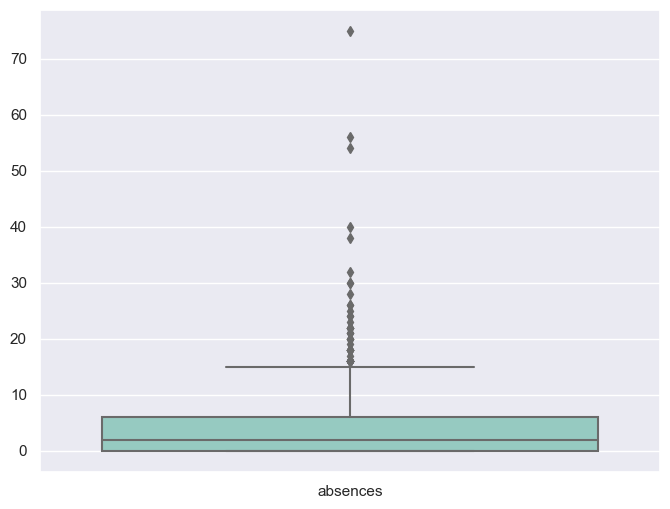

In [92]:
sns.set()
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=sex_abs, palette="Set3")

In [93]:
mean_sex_abs = student_performance.groupby('sex')['absences'].mean()

print(mean_sex_abs)

sex
F    4.505922
M    4.342163
Name: absences, dtype: float64


### sex & G1

In [107]:
sex_g1 = student_performance[['sex', 'G1']]

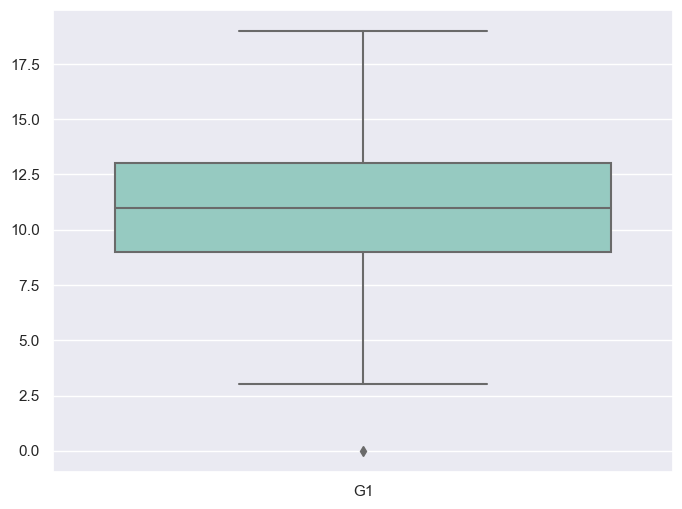

In [113]:
sns.set()
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=sex_g1, palette="Set3")

In [127]:
mean_sex_g1 = student_performance.groupby('sex')['G1'].mean()
print(mean_sex_g1)

sex
F    11.279188
M    11.128035
Name: G1, dtype: float64


### sex & G3

In [115]:
sex_g3 = student_performance[['sex', 'G3']]

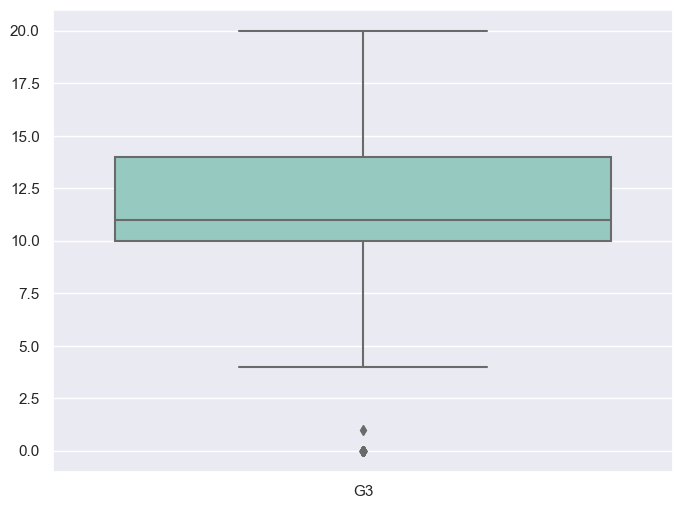

In [116]:
sns.set()
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=sex_g3, palette="Set3")

In [117]:
mean_sex_g3 = student_performance.groupby('sex')['G3'].mean()

print(mean_sex_g3)

sex
F    11.448393
M    11.203091
Name: G3, dtype: float64


### reason & age

In [118]:
reason_age = student_performance[['reason', 'age']]

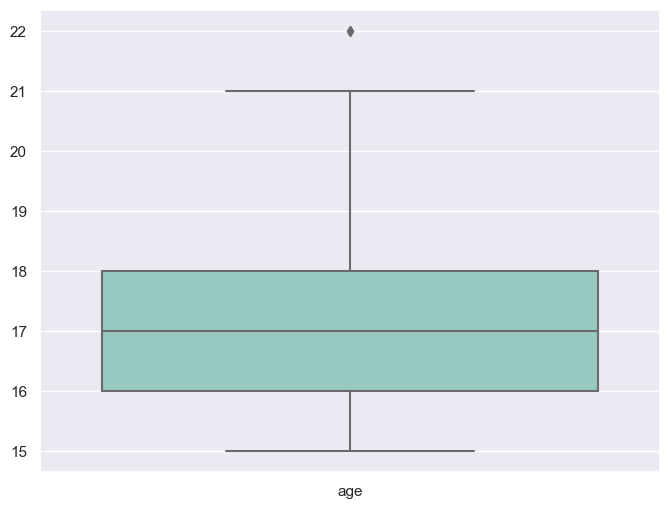

In [119]:
sns.set()
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=reason_age, palette="Set3")

In [120]:
mean_reason_age = student_performance.groupby('reason')['age'].mean()

print(mean_reason_age)

reason
course        16.753488
home          16.720930
other         16.750000
reputation    16.673387
Name: age, dtype: float64


### reason & absences

In [104]:
reason_abs = student_performance[['reason', 'absences']]

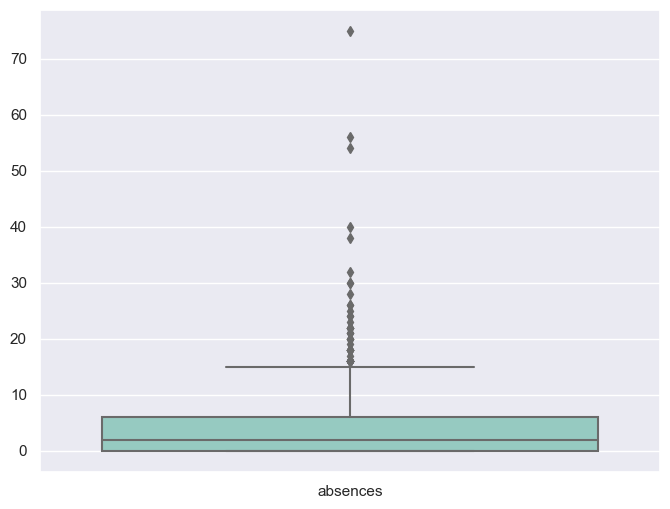

In [105]:
sns.set()
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=reason_abs, palette="Set3")

In [106]:
mean_reason_abs = student_performance.groupby('reason')['absences'].mean()

print(mean_reason_abs)

reason
course        3.586047
home          5.593023
other         3.722222
reputation    5.012097
Name: absences, dtype: float64


### reason & G1

In [121]:
reason_g1 = student_performance[['reason', 'G1']]

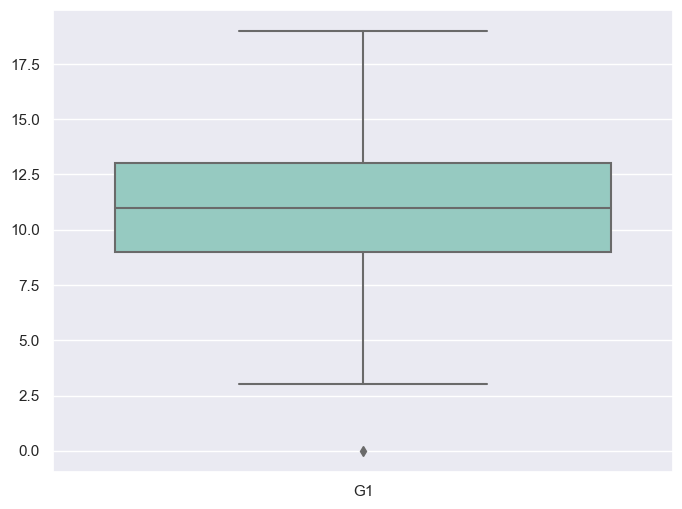

In [122]:
sns.set()
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=reason_g1, palette="Set3")

In [123]:
mean_reason_g1 = student_performance.groupby('reason')['G1'].mean()

print(mean_reason_g1)

reason
course        10.853488
home          11.302326
other         10.740741
reputation    11.951613
Name: G1, dtype: float64


### reason & G3

In [124]:
reason_g3 = student_performance[['reason', 'G3']]

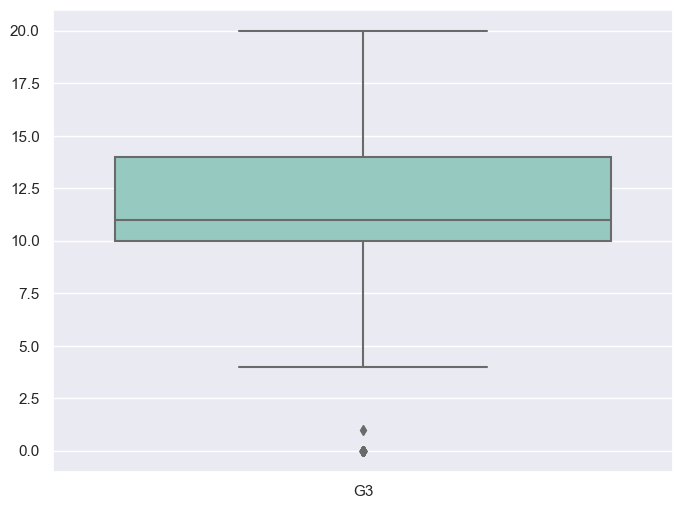

In [125]:
sns.set()
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=reason_g3, palette="Set3")

In [126]:
mean_reason_g3 = student_performance.groupby('reason')['G3'].mean()

print(mean_reason_g3)

reason
course        10.965116
home          11.368217
other         10.851852
reputation    12.181452
Name: G3, dtype: float64


# Conclusie

Deze dataset bevat meer vrouwelijke studenten dan mannelijke studenten. De gemiddelde leeftijd van de studenten is 16. De educatie van de moeders van de studenten ligt hoger dan die van de vaders. De reden'reputatie'om deze school te kiezen ligt hoger bij studenten waarbij de moeder een hogere educatie heeft gehad. De educatie van de vaders hebben geen sterk verband met het kiezen van de school door de reputatie. De variabelen die veel verband met elkaar houden zijn G1 & G3. Deze variabelen hebben een hoog correlatie niveau.